# Flower Classification

In this project, an image classifier is trained to recognize different species of flowers.  

**Dataset:**  
[This Flower Dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories is used for this project

In [1]:
# Import TensorFlow 
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

# Ignore some warnings that are not relevant (you can remove this if you prefer)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# TODO: Make all other necessary imports.
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# Some other recommended settings:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
tfds.disable_progress_bar()

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  The training data has to be normalized and resized to 224x224 pixels as required by the pre-trained networks.


In [4]:
# Load the dataset with TensorFlow Datasets. Hint: use tfds.load()
dataset, dataset_info = tfds.load('oxford_flowers102', as_supervised=True, with_info=True)
# Create a training set, a validation set and a test set.
training_set, validation_set, test_set = dataset['train'], dataset['validation'], dataset['test']

In [5]:
dataset_info

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
    in the United Kingdom. Each class consists of between 40 and 258 images. The images have
    large scale, pose and light variations. In addition, there are categories that have large
    variations within the category and several very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set.
    The training set and validation set each consist of 10 images per class (totalling 1020 images each).
    The test set consists of the remaining 6149 images (minimum 20 per class).
    
    Note: The dataset by default comes with a test size larger than the train
    size. For more info see this [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102/',
    data

## Explore the Dataset

In [6]:
# Get the number of examples in each set from the dataset info.
num_training_examples = dataset_info.splits['train'].num_examples
num_validation_examples = dataset_info.splits['validation'].num_examples
num_test_examples = dataset_info.splits['test'].num_examples

print("Images in the training set: {}".format(num_training_examples))
print("Images in the validation set: {}".format(num_validation_examples))
print("Images in the test set: {}".format(num_test_examples))

# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = dataset_info.features['label'].num_classes

print("\nNumber of classes in the dataset: {}".format(num_classes))

Images in the training set: 1020
Images in the validation set: 1020
Images in the test set: 6149

Number of classes in the dataset: 102


In [7]:
# Print the shape and corresponding label of 3 images in the training set.
for image, label in training_set.take(3):
    print("\u2022 shape: ", image.shape, "\n\u2022 label: ", label.numpy(), "\n")

• shape:  (500, 667, 3) 
• label:  72 

• shape:  (500, 666, 3) 
• label:  84 

• shape:  (670, 500, 3) 
• label:  70 



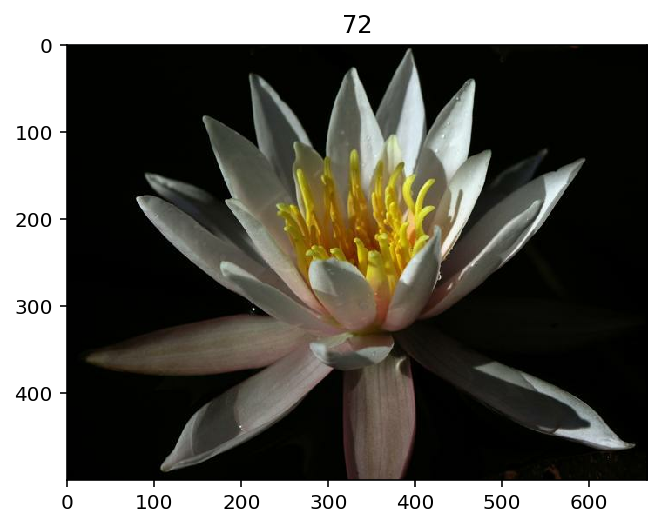

In [8]:
# Plot an image from the training set. 
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

# Set the title of the plot to the corresponding image label. 
plt.imshow(image)
plt.title(label)
plt.show()

### Label Mapping

Load the labels from `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [9]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

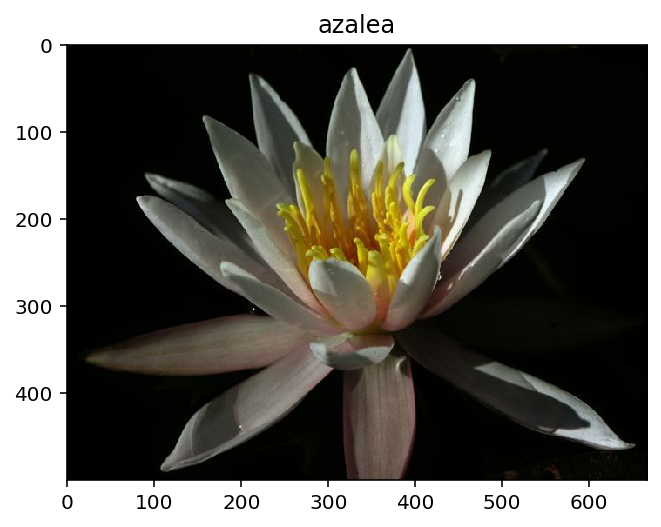

In [10]:
# TODO: Plot 1 image from the training set. Set the title of the plot to the corresponding class name. 
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.imshow(image)
plt.title(class_names[str(label)])
plt.show()

## Create Pipeline

In [11]:
batch_size = 32
image_size = 224

In [12]:
# Create a pipeline for each set.
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    image = tf.image.resize(image, (image_size, image_size))
    
    return image, label

training_batches = training_set.cache().shuffle(buffer_size=10*batch_size).padded_batch(batch_size).map(normalize).prefetch(1)
validation_batches = validation_set.cache().padded_batch(batch_size).map(normalize).prefetch(1)
testing_batches = test_set.cache().padded_batch(batch_size).map(normalize).prefetch(1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


# Build and Train the Classifier

I am going to use the MobileNet pre-trained model from TensorFlow Hub to get the image features and build and train a new feed-forward classifier using those features.

In [13]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL, input_shape=(image_size, image_size, 3))

In [14]:
feature_extractor.trainable = False

In [15]:
# Build and train your network.
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
EPOCHS = 35

# Stop training when there is no improvement in the validation loss for 10 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


history = model.fit(training_batches, 
                    epochs=EPOCHS, 
                    validation_data=validation_batches,
                    callbacks=[early_stopping])

Epoch 1/35
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - ETA: 0s - loss: 4.3314 - accuracy: 0.0951WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f3e202ce320> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - 54s 2s/step - loss: 4.3314 - accuracy: 0.0951 - val_loss: 3.2586 - val_accuracy: 0.3373
Epoch 2/35
32/32 [==============================] - 49s 2s/step - loss: 2.4090 - accuracy: 0.5892 - val_loss: 2.2433 - val_accuracy: 0.5922
Epoch 3/35
32/32 [==============================] - 49s 2s/step - loss: 1.4647 - accuracy: 0.8088 - val_loss: 1.7689 - val_accuracy: 0.6549
Epoch 4/35
32/32 [==============================] - 49s 2s/step - loss: 1.0051 - accuracy: 0.8912 - val_loss: 1.5151 - val_accuracy: 0.7029
Epoch 5/35
32/32 [==============================] - 49s 2s/step - loss: 0.7477 - accuracy: 0.9284 - val_loss: 1.3401 - val_accuracy: 0.7441


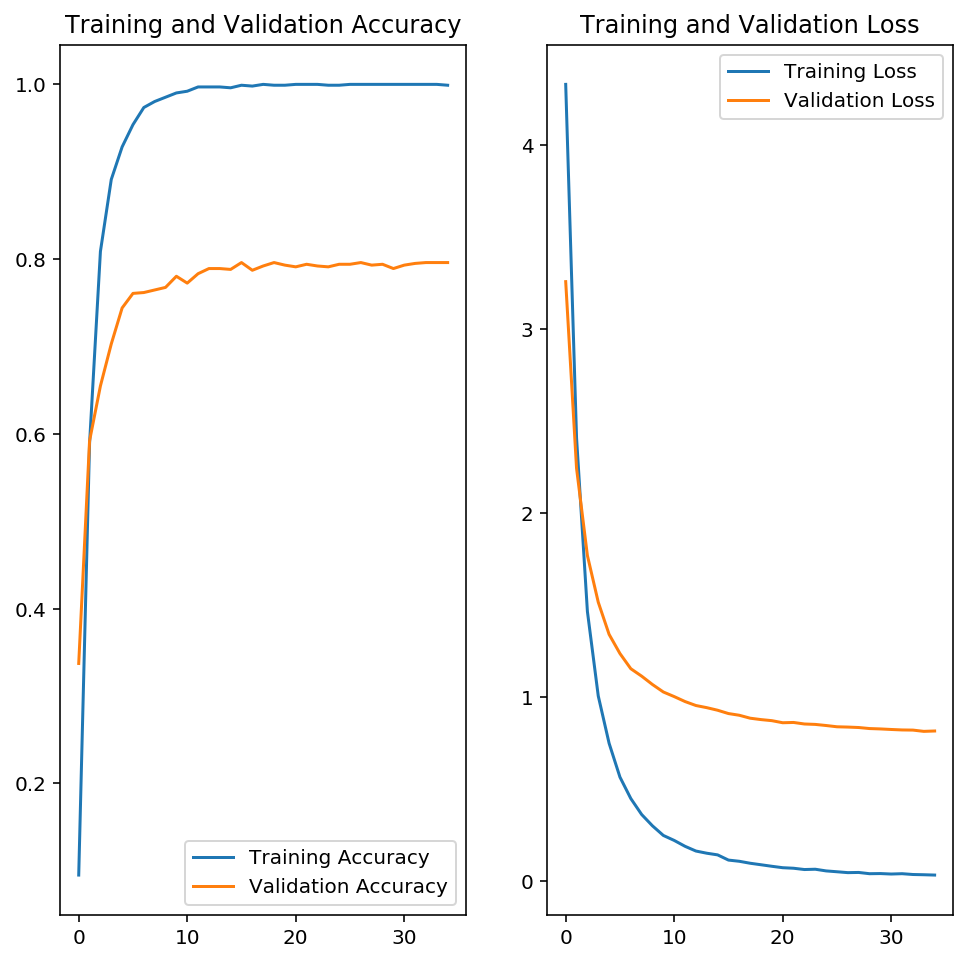

In [18]:
# Plot the loss and accuracy values achieved during training for the training and validation set.
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [19]:
# Print the loss and accuracy values achieved on the entire test set.
loss, accuracy = model.evaluate(testing_batches)

print("Test Set Loss: {:,.3f}".format(loss))
print("Test Set Accuracy: {:,.3f}".format(accuracy))

193/193 [==============================] - 150s 775ms/step - loss: 0.9662 - accuracy: 0.7569
Test Set Loss: 0.966
Test Set Accuracy: 0.757


## Save the Model

In [20]:
saved_model_path = './fc_model.h5'

In [21]:
# Save your trained model as a Keras model.
model.save(saved_model_path)

## Load the Keras Model

Load the Keras model you saved above.

In [22]:
# Load the Keras model
loaded_model = tf.keras.models.load_model(saved_model_path, custom_objects={'KerasLayer': hub.KerasLayer})
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


# Inference for Classification

### Image Pre-processing

The `process_image` function takes in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, convert the image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [23]:
# Create the process_image function
def process_image(image):
    # Convert the image into a tensorflow tensor
    image = tf.convert_to_tensor(image)
    # Resize it to appropriate image size i.e. 224x224
    image = tf.image.resize(image, (image_size, image_size))
    # Normalize the pixel values
    image /= 255
    
    return image

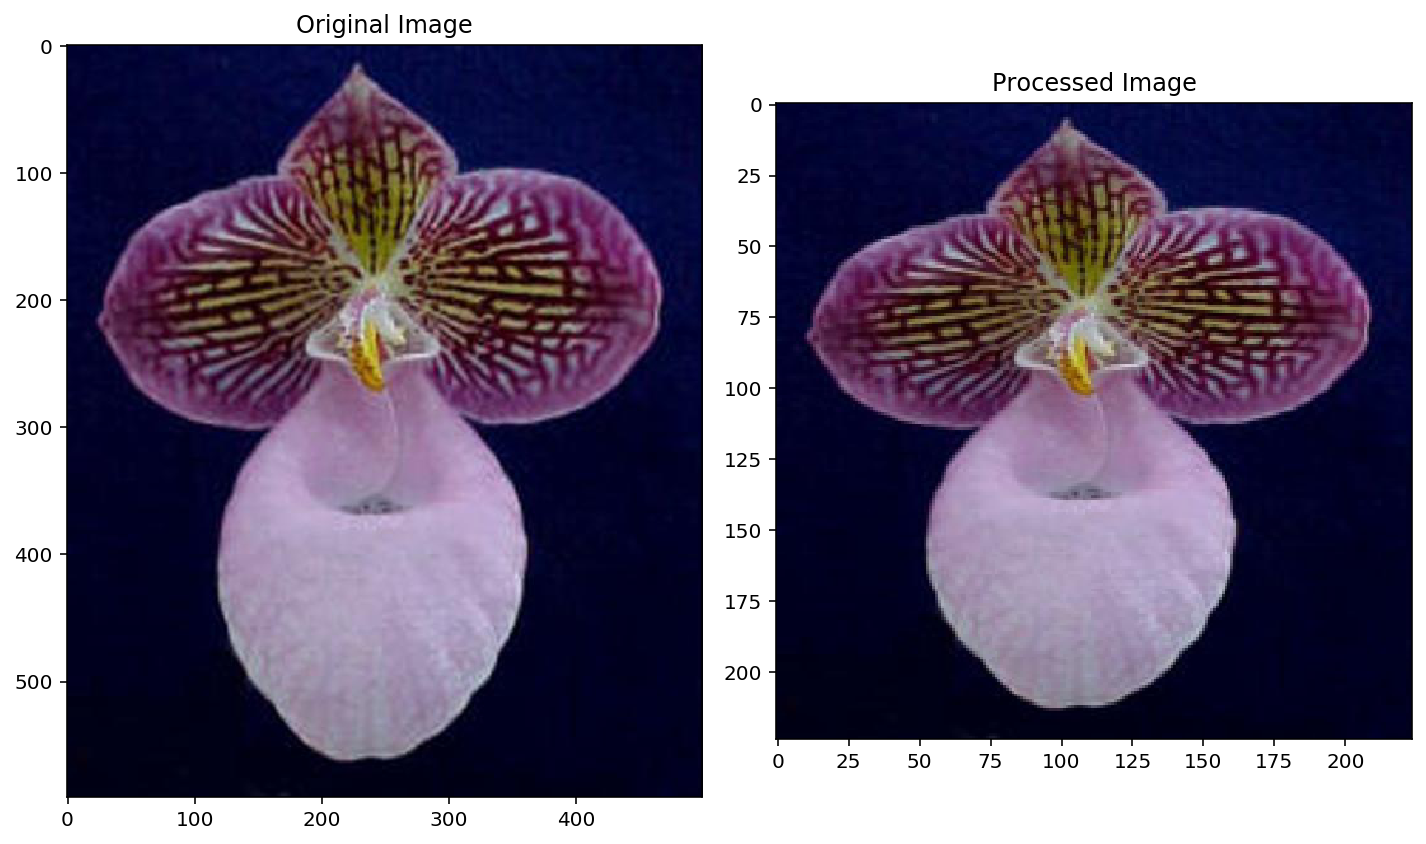

In [24]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()


### Inference

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. So I will use the `np.expand_dims()` function to add the extra dimension. 

In [25]:
# Create the predict function
def predict(image_path, model, top_k):
    # Open the image
    img = Image.open(image_path)
    # Convert the image to NumPy array
    img_numpy = np.asarray(img)
    # Process the image using process_image function
    img_processed = process_image(img_numpy)
    # Add the extra (batch) dimension to the image shape
    img_expanded = np.expand_dims(img_processed, axis=0)
    
    predictions = model.predict(img_expanded)
    
    # Get the index of maximum values, this will be used for getting the labels and convert them to list
    top_k_probs, top_k_classes = tf.nn.top_k(predictions, k=top_k)
    
    # Get the top_k probabilities, convert it to numpy and then to list
    probs = top_k_probs[0].numpy().tolist()
    # Get the top_k classes, convert it to numpy and then to list
    classes = top_k_classes[0].numpy().tolist()
    
    # Round off probs to 6 decimal places
    probs = [round(p, 6) for p in probs]
    # Convert the classes to strings, +1 is for making it consistent with the actual class labels because
    # the array index starts from 0 and class labels do not have any label 0
    classes = [str(c+1) for c in classes]
    
    return probs, classes, img_processed

# Sanity Check

In [26]:
def plot_result(probs, classes, image):
    label = classes[0]
    label_names = [class_names[str(l)] for l in classes]
    
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img_processed)
    ax1.axis('off')
    ax1.set_title(class_names[str(label)])
    ax2.barh(np.arange(5), probs)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(5))
    ax2.set_yticklabels(label_names, size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

1/1 [==============================] - 0s 51ms/step


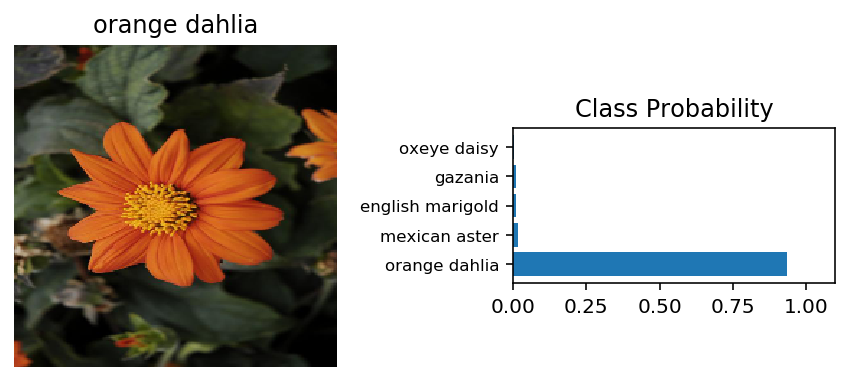

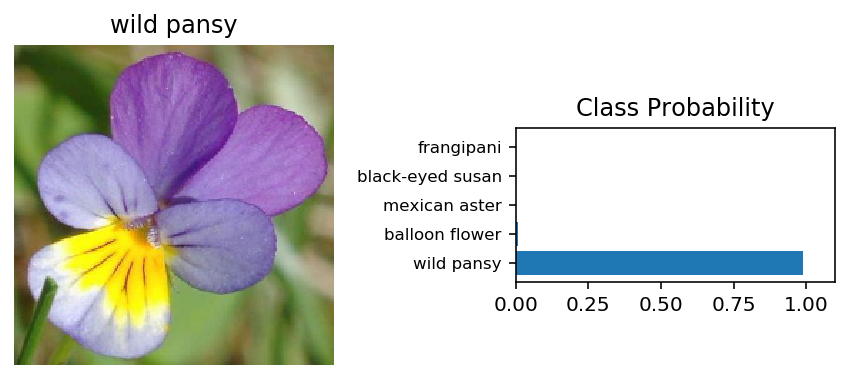

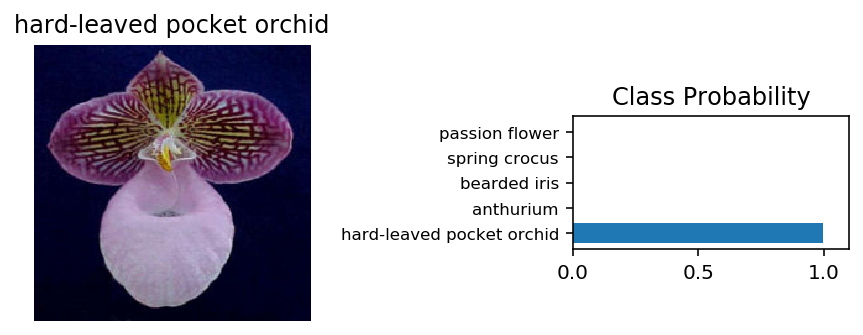

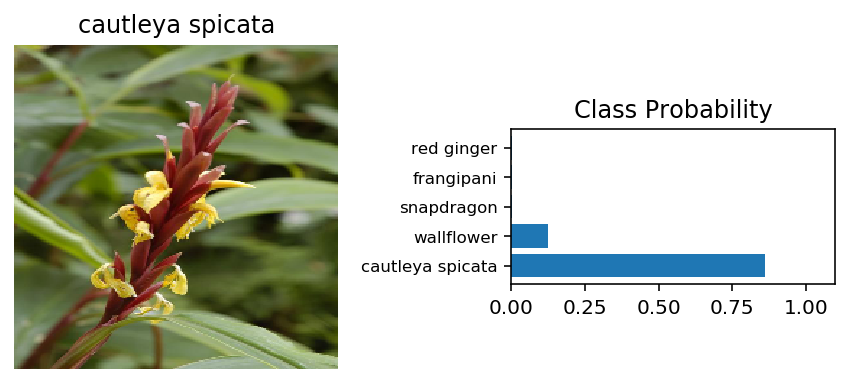

In [28]:
# Plot the input image along with the top 5 classes
import os
# Get the names of all images in test_images directory
for image in os.listdir('./test_images'):
    # form a relative path to an image
    image_path = './test_images/' + image
    # get the predictions
    probs, classes, img_processed = predict(image_path, loaded_model, 5)
    # plot the results
    plot_result(probs, classes, img_processed)